II部は「ニューラルネットワークと深層学習」を学びます。
深層学習の中心的モデルは、幾層にも連結したニューラルネットワークモデルです。特に深層学習の代表的モデルである畳み込みニューラルネットワーク（Convolutional Neural Network:CNN）について学習していきます。

9章からGoogleのDeep Learningフレームワーク[Tensorflow](https://www.tensorflow.org/)を利用します。
Anaconda環境(注1)へTensorflowをインストールするステップは次の通りです。

注1:非GPU搭載マシンのLOCAL PCの場合。
***
Tensorflowのセットアップ
1. Anaconda promptを起動。
2. pip install tensorflowでインストール。
3. conda listで、インストール済ライブラリのリストを表示。
```
tensorflow                1.3.0                     <pip>
tensorflow-tensorboard    0.1.4                     <pip>
```
上記2件がリストに表示されていれば準備OKです。

4. tensorflowのupgrade処理(適宜)。
　　　- the most recent stable branch r1.3(注：17-11-04時点).
      - [versions of tensorflow](https://www.tensorflow.org/versions/)

```
pip install --ignore-installed --upgrade tensorflow
```

conda listで下記表示されます。
```
tensorflow                1.4.0                     <pip>
tensorflow                1.3.0                     <pip>
tensorflow-tensorboard    0.4.0rc2                  <pip>
tensorflow-tensorboard    0.1.4                     <pip>
```

5. jupyter notebookの起動ディレクトリに移動。
6. mkdir tf_logs; mkdir logs;  でtensorboardのログを保存するディレクトリ作成。
輪読本コードは、相対パスでディレクトリを指定している事に注意。
7. mkdir images; 画像保存用ディレクトリ作成
***

***
- TensorFlowはオープンソースソフトウェアライブラリ
- Pythonで計算定義すると、最適化されたC ++コードを実行
- グラフをチャンクに分割して実行する機能で、複数のCPUまたはGPUを使った並列計算が可能（図9-2参照）

|図9_1|図9_2|
|:-:|:-:|
|<img width="280" alt="F9_1.png" src="./images/F9_1.PNG">|<img width="280" alt="F9_2.png" src="./images/F9_2.PNG">|

- TensorFlowは分散コンピューティングもサポート(巨大なNeural Networkを分割計算)
- 並列計算は、何百サーバー対応可
- 数十億のインスタンスの訓練セット、何百万のパラメータ
　　　- インスタンスの例：[iris dataset](http://archive.ics.uci.edu/ml/datasets/Iris)(150 instances, 4 attributes)
- Google Brainチームが開発(Googleクラウドスピーチ、Googleフォト、Google検索に応用)
- 2015年11月にオープンソース化
- Popular open source libraries of Deep Learning
      - Caffe
      - DeepLearning4J
      - H2O
      - MXNet
      - Tensorflow
      - Theano
      - Torch
      - Chainer(日本PFN)
- 特徴
  - プラットフォーム(Windows, Linux,MacOSX, iOS and Android)
  - python API called TF.Learn 2 
     - tensorflow.contrib.learn compatible with Scikit-Learn. 
     - 昔はScikit Flow(skflow)ライブラリとして提供。
     - skflowは0,80からtensorflowに統合。
  - 高レベルAPIsがTensorFlowをバックエンドとして組み込まれる。 
   　- Keras (NN Architectureを簡単に定義できる.Popular Library)
     - Pretty Tensor
  - C++ APIも高性能操作用に提供.
  - コスト関数最小化の為のパラメータ検索用機能
     - TensorFlowが定義した関数の勾配を自動計算
     - AutoDiff機能と呼ばれる
  - TensorBoardと呼ばれる視覚化ツール
     - 計算グラフの表示
     - 学習曲線の表示
  - Googleはtensorflowの[クラウドサービス](https://cloud.google.com/ml/)提供.
     - [1,000 Cloud TPUs](https://www.tensorflow.org/tfrc/)
     - 180 teraflops of ML acceleration
  - Forum,Q&A,コミュニティ作成tensorflowコード
     - resources page on https://www.tensorflow.org/, 
     - https://github.com/jtoy/awesome-tensorflow. 
     - To ask technical questions, http://stackoverflow.com/ "tensorflow" tag.                  
     - google group: [tensorflow forum](http://goo.gl/N7kRF9)
  - 日本のコミュニティ
     - 東京 [TensorFlow User Group Tokyo](https://tfug-tokyo.connpass.com/)
     - 大阪 [Soleil Data Dojo](https://soleildatadojo.connpass.com/)
     - 宇都宮 [TensorFlow User Group Utsunomiya](https://tfug-utsunomiya.connpass.com/)
    

***

9章ではTensorflowの基礎を一通り実行
  - 9章の項目
    - installation 
    - creating,
    - running, 
    - saving 
    - visualizing simple computational graphs.  
- GPUバージョンのTensorflowをインストールする場合
    - Cuda Toolkit and cuDNN (available on https://developer.nvidia.com/) 
    - Setting a couple environment variables. 
    - See the installation page on https://www.tensorflow.org/.
    - インストールが難しい(バージョン組合せに試行錯誤必要)
    - NIGスパコンチームがQsub環境GPU版を準備中

## [9-1] Tensorflow用のSetup p.244

In [2]:
#- 作図用の関数を準備。[MatplotLib plots figures inline/Saving figures]
#- ホーム直下のimagesディレクトリを作成しておく。

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

#----- Common imports
import numpy as np
import os

#--------- to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

#----- To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#-------- Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

### [9-2] Creating your first graph and running it in a session p.245
p.245

Tensorflowはデータフローグラフ表現で、計算を行います。
データフローグラフとは、データの流れをエッジとノードで表現したグラフです。
  - 楕円node＝計算(operation)
  - 円node=定数(operation)
  - エッジ=Tensor

参考LINK
 - [Tensor(n次元多次元配列)の解説](https://qiita.com/rneuo/items/54c88088941bb5c47d17)
 - [Opノード、エッジ、セッション、変数の説明](https://qiita.com/yanosen_jp/items/70e6d6afc36e1c0a3ef3)
 - [a+b, 最急降下法のグラフ例](http://developers.gnavi.co.jp/entry/tensorflow-deeplearning-2_1)

In [3]:
# 図9_1の計算グラフを生成
# - 変数初期化せず
# - グラフを評価するには
#    - ①TensorFlowセッションを開き、
#    - ②変数を初期化、
#    - ③fを評価、が必要
import tensorflow as tf
import tensorboard as tb   # -> (注：追加）

reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

In [4]:
# Tensorflowセッションを開き、変数初期化、fを評価、セッションを閉じる
# （セッションを閉じる=リソースを解放）

sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

sess.close()

42


In [5]:
# withブロックの中で読みやすくなる
#   - default sessionとして登録
#   - x.initializer.run（）= tf.get_default_session（）.run（x.initializer）
#   - f.eval（）= tf.get_default_session（）.run（f）
#   - withブロック終わりでsession自動的に閉じる

with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [6]:
result

42

In [7]:
# global_variable_initializers（）関数
# - 単一変数毎にinitializerを手動でrunする代用 
# - 実際には実行されないことに注意
# - グラフにすべての変数を初期化するノードが作成される

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()

In [8]:
result

42

In [9]:
# JupyterやPythonシェル中で、InteractiveSessionを使いたい場合
#   - Session vs InteractiveSession
#   - 作成時に自動でデフォルトセッションとして設定される
#   - withブロックは必要なし
# 　- セッションを手動で終了必要
# 
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)
sess.close()

42


In [10]:
result

42

TensorFlowプログラムは、通常、2つの部分に分割される。
 - 1. 構築フェーズ＝計算グラフ構築
 - 2. 実行フェーズ＝run 

構築フェーズでは、通常、MLモデルの計算グラフが作成され、訓練を行う。 
実行フェーズは、一般に、モデルパラメータを改善していく、
繰り返し訓練の評価ループ(例えば、ミニバッチごとの1ステップ)を実行する。

```
*mini batch法とは
　訓練データからランダムにデータの塊を呼び出して学習する方式
   
   epoch数＝訓練データの学習回数
   
   例 datasize＝1500, batch_size=100,epoch=10
        --> 15回パラメータ更新してデータが一巡。
   　　 --> epoch=10で10回繰り返し。全計算で15x10=150回のパラメータ更新。
　　例：datasize 100, batch_size=32の場合、データの区切りは下記。
　　　　0〜31
　　　　32〜63
　　　　64〜95
　　　　66〜99
    
* epochと精度の参考
http://st-hakky.hatenablog.com/entry/2017/01/17/165137
```

### [9-3] Managing graphs　p.246
### 計算グラフの管理

In [11]:
# どんなノードを生成しても自動的にデフォルトグラフに追加される
#
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [12]:
# ほとんどの場合は追加で問題ない。
# 　- 複数の独立グラフを管理したいかもしれない。
#　 - 新グラフ生成用に、withブロックで、default graphを保存しておく

graph = tf.Graph() # new graph
with graph.as_default(): # 新グラフのdefaule graphをwithで一時利用にする
    x2 = tf.Variable(2)

a1=(x2.graph is graph)
a2=(x2.graph is tf.get_default_graph()) #1時利用x2 vs default
print("a1=", a1, "\na2=",a2)

a1= True 
a2= False


---
Jupyter（またはPythonシェル）では、同じコマンドを何回も
実行します。結果として、多くの複製ノードを含むデフォルト
グラフを作る可能性があります。

解決策として次の２策がある。
- 1 Jupyterカーネルを再起動
- 2 <code>tf.reset_default_graph</code>実行でdefault graphをreset

### [9-4] Lifecycle of a node value p.247

In [13]:
#ノードを評価する時、TensorFlowはノードの依存集合を自動で決定
# 以下事例
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


ノード値ライフサイクルの特徴
- yの評価グラフで、TensorFlowはyがwに依存することを自動検出
 - 最初にw、次にx、そしてyを評価して、yの値を返す
 - z評価でも同様に計算される。wとxはyの値を再利用せず、再度計算する。
 
 - グラフの実行の間に、sessionで使う変数以外は全ノードはドロップされる(12章で説明あり)。

変数のライフサイクル
 - イニシャライザが実行されるとライフ開始
 - セッションが終了するとライフ終了


In [14]:
# 2回x,wを計算するのが望ましくない場合は、withで一つのグラフとしてy,zを定義する。
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15

10
15


＜参考情報＞
1. シングルプロセスのTensorFlow
 - 複数セッションは共有されない
 - 同じグラフを再利用しても共有されない
 - 各セッションは全変数の都度コピーを持つ

2. Distributed TensorFlowで（12章)
 - 複数セッションで同じ変数を共有できる
 - 変数の状態はセッションではなくサーバーに格納される

### [9-5] Linear Regression with Tensorflow p.248
テンソルフローでの線形回帰

TensorFlow操作（operationsの略＝ops）
 - 任意の数の入力、任意の数の出力を生成
 - 例えば、加算演算と乗算演算それぞれ2つの入力を取り、1つの出力を生成
 - 定数と変数には入力が無い（ソース操作と呼ばれます）。
 - 入力と出力は、テンソルと呼ばれる多次元配列
     - "テンソルの流れ"というツール名の由来
 - NumPy配列と同様に、テンソルは型と形状を持つ
 - 実際には、Python APIのテンソルは単にNumPy ndarrayで表される
 - 通常は浮動小数点数を含むが、文字列（任意のバイト配列）を渡すために使用可
 - 上記例では、テンソルは単なるスカラー値だが、もちろん、多次元配列で実行可
 - 例：次コードは、2次元配列を操作
     - カリフォルニア住宅のデータセット（第2章で紹介）に線形回帰を実行  
     - コードの工程
         1. データセットのフェッチ
         2. 全訓練インスタンスに、バイアス入力特徴（x0 = 1）追加。NumPyで実行。
         3. データを保持する2つのTensorFlow定数ノードXおよびyを作成
         4. ターゲット4を使用しており、Tensor-シータを定義するフロー。
         5. 関数（transpose（転置）, matmul(行列乗算),matrix_inverse（逆行列））は、                 
            すぐに計算を実行せずノードをグラフ中に作成、実行
         6. 正規方程式（第4章を参照）でthetaを定義
         7. 最後にセッションを作成し、thetaを評価する
 - 注意：housing.targetは、thetaを計算する為に、列ベクトルにreshapeする必要があります。numpyの多次元配列を一次元配列にしたいときは、1行へ変換：reshape(-1,),または1列に変換:reshape(-1,1)を使います。

### Using the Normal Equation　p.248
4章で出てくるthetaを計算して評価する

$$
theta = （X^{T}*X)^{-1} * X^{T} * ｙ 
$$

In [15]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, hpath=HOUSING_PATH):
    os.makedirs(hpath, exist_ok=True)
    tgz_path = os.path.join(hpath, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=hpath)
    housing_tgz.close()

In [16]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [17]:
# tensorflowの場合Normal Equation使う
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

reset_graph()

#------housingデータ取得--------------------
housing = fetch_california_housing()
print(housing)
print("\n\nhousing.data(type)=",type(housing.data), "\n") 

m, n = housing.data.shape #行数、列数
print("housing.data(m,n)=",m, n, "\n") 

print("housing.target(type)=",type(housing.target), "\n") 
#m2, n2 = housing.target.dim() #行数、列数
#print('housing.target(m,n)=',m2, n2, "\n") 

print(type(housing))

#housingデータの構造
#   housing.data
#   housing.target
#   housing.feature_names


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ..., 
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([ 4.526,  3.585,  3.521, ...,  0.923,  0.847,  0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu

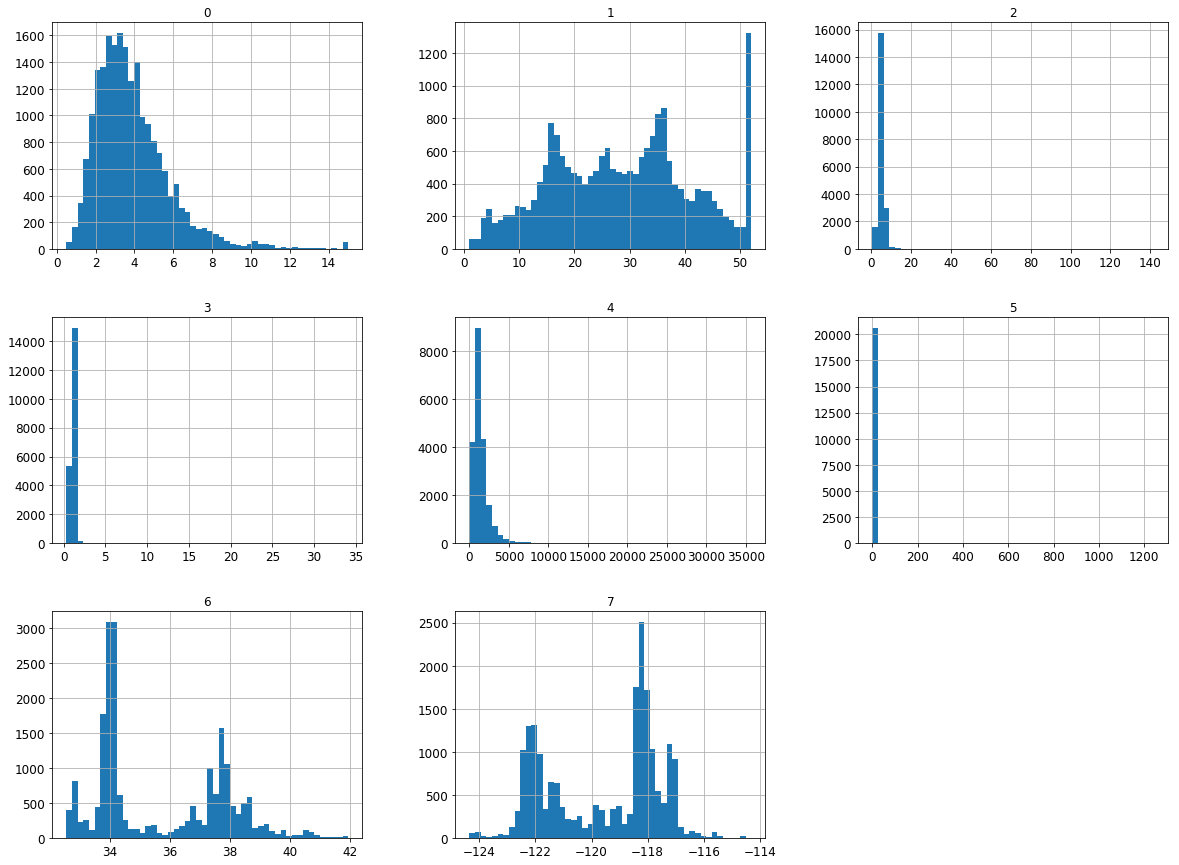

In [18]:
#------housingデータをpandas.Dataframeに変換したらp.49の関数で確認可能--------------------
#
housing2 = pd.DataFrame(housing.data)
housing2.hist(bins=50, figsize=(20,15))
plt.show()

#housing2.head()


In [19]:
housing2.info() #info()=header--wk, describe()=mean table, head()=raw table --not wk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
0    20640 non-null float64
1    20640 non-null float64
2    20640 non-null float64
3    20640 non-null float64
4    20640 non-null float64
5    20640 non-null float64
6    20640 non-null float64
7    20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [20]:
tmp=np.ones((m, 1))
print(tmp.shape) #行列数
print('np.ones((m, 1)) type=',type(tmp)) #型
print(tmp) #1列の1データ

housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data] #列で連結

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
print('X type=',type(X))
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")#1列に変換
print('Y type=',type(y))
XT = tf.transpose(X) #転置
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y) 
# theta =（XT*X)^(-1)*XT*ｙ

with tf.Session() as sess:
    theta_value = theta.eval()

(20640, 1)
np.ones((m, 1)) type= <class 'numpy.ndarray'>
[[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]
X type= <class 'tensorflow.python.framework.ops.Tensor'>
Y type= <class 'tensorflow.python.framework.ops.Tensor'>


In [21]:
theta_value

array([[ -3.74651413e+01],
       [  4.35734153e-01],
       [  9.33829229e-03],
       [ -1.06622010e-01],
       [  6.44106984e-01],
       [ -4.25131839e-06],
       [ -3.77322501e-03],
       [ -4.26648885e-01],
       [ -4.40514028e-01]], dtype=float32)

Tensorflow vs NumPy

主な利点は、TensorFlowはGPUカード上でこの計算
(正規方程式を直接計算すること)を自動実行することです。
（GPUサポート付きのTensorFlowをインストールしたい場合は、第12章を参照）

[1] Compare with pure NumPy vs Tensorflow

In [22]:
# NumPyで計算する場合 [（XT*X)^(-1)*XT*ｙ ]
# np.dot:内積
# np.linalg.inv:逆行列
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) 

print(theta_numpy)

[[ -3.69419202e+01]
 [  4.36693293e-01]
 [  9.43577803e-03]
 [ -1.07322041e-01]
 [  6.45065694e-01]
 [ -3.97638942e-06]
 [ -3.78654265e-03]
 [ -4.21314378e-01]
 [ -4.34513755e-01]]


[2] Compare with Scikit-Learn vs Tensorflow

- [sklearn線形回帰の参考ページ](https://qiita.com/kento1109/items/3bfa934fbdfcef8ef186)
- [MATLAB線形回帰の説明ページ](https://jp.mathworks.com/help/matlab/data_analysis/linear-regression.html)


In [23]:
# Scikit-Learnで計算する場合
# 線形回帰モデル
# np.r_ :　行で連結
# lin_reg.intercept_:切片（線形回帰モデルの独立項）y=ax+bの'b'
# lin_reg.coef_:係数 y=ax+bの'a'
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1)) #線形回帰

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[ -3.69419202e+01]
 [  4.36693293e-01]
 [  9.43577803e-03]
 [ -1.07322041e-01]
 [  6.45065694e-01]
 [ -3.97638942e-06]
 [ -3.78654265e-03]
 [ -4.21314378e-01]
 [ -4.34513755e-01]]


### [9-6] Implementing Batch Gradient Descent p.249

Batch Gradient Descent（第4章で紹介した）をNormal Equationの代わりに
使ってみましょう。 まず、勾配を手動で計算します。
TensorFlowのAutoDiff機能を使用して、TFが自動的に勾配を
計算できるようにします。最後に、TensorFlowの2つのOptimizerを使用します。

```
Gradient Descentを使用する場合は、入力特徴ベクトルを
最初にnormalizeすることが重要だった事を思い出してください。
TensorFlow、NumPy、Scikit-LearnのStandardScaler、
または他のライブラリにもnormalize機能があります。 

```


In [24]:
#StandardScalerでデータをNormalize
# np.c_: np.concatenate 連結
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

print(type(scaled_housing_data_plus_bias))

print(scaled_housing_data_plus_bias.ndim)
scaled_housing_data_plus_bias.reshape
print(scaled_housing_data_plus_bias.size)


#scaled_housing_data_plus_bias.describe()
#print('housing_bias.reshape=',m1,n1)

<class 'numpy.ndarray'>
2
185760


In [25]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[  1.00000000e+00   6.60969987e-17   5.50808322e-18   6.60969987e-17
  -1.06030602e-16  -1.10161664e-17   3.44255201e-18  -1.07958431e-15
  -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ..., -0.06612179 -0.06360587
  0.01359031]
0.111111111111
(20640, 9)


### [9-6-1] Manually computing the gradients p.249
手動で勾配を計算

次のコードは、いくつかの新しい要素を除いて、かなり自明であるはずです。
```
•random_uniform（）関数
　　- ランダム値を含むテンソルを生成。
    - グラフに1つノードを生成。
　  - NumPyのrand関数に類似
•assign（）関数
　  - 変数に新しい値を割り当てる
    - 1つノードを作成
　　- 今回はBatch Gradient Descentステップを実装します
```
$$
Batch~Gradient~Descent : \theta^{next step} =\theta - \eta\nabla _{\theta}MSE(\theta)
$$
```
•メインループ 
    - n_epoch回数分、訓練ステップを繰り返し実行します
    - 100回の反復ごとに、平均2乗誤差（MSE）をプリントアウト
```

$$
MSE = \frac{1}{n}\sum_{t=1}^{n}( y\_pred_{t} - y_{t} )^2   
$$

In [26]:
# 手動で計算する例:AutoDiffを使わない版
reset_graph()

n_epochs = 1000 #反復数
learning_rate = 0.01

# tf.random_uniform  一様乱数生成,seedを変更すると生成パターンを変更できる
# theta = 乱数
# y_pred = Xと乱数の乗算
#
X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions") 



error = y_pred - y #予測誤差
mse = tf.reduce_mean(tf.square(error), name="mse") #MSE=平均2乗誤差
gradients = 2/m * tf.matmul(tf.transpose(X), error) #勾配計算
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147


In [27]:
best_theta

array([[ 2.06855249],
       [ 0.88740271],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393812],
       [-0.04269557],
       [-0.66145277],
       [-0.63752776]], dtype=float32)

### [9-6-2 ] Using autodiff p.250

AutoDiffを使って勾配計算を自動化します

***

上記の手動計算コードはコスト関数（MSE）から導かれる。
線形回帰の場合は簡単ですが、Deep Neural Networkで使おうとしたら、
エラーを起こしやすいでしょう。
↓
そこで自動化「symbolic differentiation」
↓
自動的に偏微分の方程式を計算する。
が、結果のコードは必ずしも効率的ではない。

関数f(x) = exp (exp (exp (x)))の事例
　- f '(x) = exp (x)×exp (exp(x))×exp( exp( exp( x)))
  - このf(x)とf '(x)を直接コーディングは非効率　[※ exp(x)を9回call]
　- 効率的な解決策は、
 　　　- 最初にexp(x)
       - 次にexp(exp(x))
       - 次にexp(exp(exp(x)))
       - 3項分の計算を全て返す
  - 3番目が直接の解になっている[※ exp(x)を3回callのみ]

***
  
関数が任意のコードで定義されていると事態は悪化します。
次の関数の偏微分を計算するための方程式（またはコード）を見つける事は出来ますか?

```
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z
```
TFのAutoDiffの場合は、自動で偏微分を計算できる。
```
    gradients = tf.gradients(mse, [theta])[0]
```
前回のgradient descentのコードを上記に置き換えるだけで良い。
tf.gradients関数には、Op（この場合はMSE）と変数リスト(theta)を入力します。
Opsのリストを変数ごとに1つ作成し、Opの勾配を変数毎に計算します。
つまり、gradientsノードはthetaに関してMSEの勾配ベクトルを計算します。

勾配の自動計算法は4つの方法がある(表9-2)
TensorFlowはリバースモードのAutoDiffを使用しています。
多くの入力があり、出力が少ない場合、つまりNeural Networkのケースで
精度が上がる。TFは、出力のすべての偏微分を計算します。
$$n_{outputs} + 1$$グラフの横断で、入力全てに関して出力値の偏微分を計算します。


Table 9_2

| Technique | Nb of graph traversals | Accuracy | Supports arbitrary code | Comment |
|:-------------|:------------|:-------------|:---------|:---------|
| Numerical differentiation | ninputs + 1 | Low | Yes | Trivial to implement |
| Symbolic differentiation| N/A | High | No | Builds a very different graph |
| Forward-mode autodiff | ninputs | High | Yes | Uses dual numbers |
| Reverse-mode autodiff | noutputs + 1 | High | Yes |  Implemented by TensorFlow |




In [28]:
# tensorflowのautodiffの場合
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [29]:
gradients = tf.gradients(mse, [theta])[0]

In [30]:
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147
Best theta:
[[ 2.06855249]
 [ 0.88740271]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145277]
 [-0.6375277 ]]


以下、本には掲載されていない事例[A-1]
How could you find the partial derivatives of the following function with regards to `a` and `b`?

In [31]:
#掲載なし事例(ref.p.250)[A-2]
def my_func(a, b):
    z = 0
    for i in range(100):
        z = a * np.cos(z + i) + z * np.sin(b - i)
    return z

In [32]:
#掲載なし事例[A-3]
my_func(0.2, 0.3)

-0.21253923284754914

In [33]:
#掲載なし事例[A-4]
reset_graph()

a = tf.Variable(0.2, name="a")
b = tf.Variable(0.3, name="b")
z = tf.constant(0.0, name="z0")
for i in range(100):
    z = a * tf.cos(z + i) + z * tf.sin(b - i)

grads = tf.gradients(z, [a, b])
init = tf.global_variables_initializer()

In [34]:
#掲載なし事例 [A-5]
# Let's compute the function at $a=0.2$ and $b=0.3$, and the partial 
# derivatives at that point with regards to $a$ and with regards to $b$:
with tf.Session() as sess:
    init.run()
    print(z.eval())
    print(sess.run(grads))

-0.212537
[-1.1388494, 0.19671395]


### [9-6-3] Using a optimizer : `GradientDescentOptimizer`　p.251

In [35]:
# TensorFlow computes the gradients. 
# TensorFlowはa Gradient Descent optimizer以外にもoptimizersがある。
# 使いたい場合は、(gradients = ...,training_op = ...) 行を置き換えるだけ。

reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [36]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [37]:
# 異なるOptimizerを使いたたい時は、1行変更するだけで良い
# momentum optimizerは、勾配降下法より速く収束する。
# 11章でoptimizerを定義する。

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147
Best theta:
[[ 2.06855249]
 [ 0.88740271]
 [ 0.14401658]
 [-0.34770882]
 [ 0.36178368]
 [ 0.00393811]
 [-0.04269556]
 [-0.66145277]
 [-0.6375277 ]]


### Using a momentum optimizer
momentum optimizerの使い方(本に掲載無し)

In [38]:
# momentum optimizer事例：本掲載なし[B-1]
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [39]:
# momentum optimizer事例：本掲載なし[B-2]
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [40]:
# momentum optimizer事例：本掲載なし[B-3]
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [41]:
# momentum optimizer事例：本掲載なし[B-4]
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Best theta:
[[ 2.06855798]
 [ 0.82962859]
 [ 0.11875337]
 [-0.26554456]
 [ 0.30571091]
 [-0.00450251]
 [-0.03932662]
 [-0.89986444]
 [-0.87052065]]


### [9-7] Feeding data to the training algorithm p.252

####
Mini-batch gradient descentを実装するために、上のコードを修正する
 - mini-batchで各iterationでXとyを置き換える。
 - placeholderノードだと簡単。
 - これらのノードは計算実行せず、Tensorflowに訓練データを渡す
 
Placeholderノード生成
 - placeholder() function とtensorデータ型指定
 - データ型Noneも指定可能
 - a placeholder node A, and also a node B = A + 5. 
    - we pass a feed_dict to the eval() method that specifies the value of A.
    - Aはrank2(= 2dim), 3 columns,it can have any number of rows.

#### [9-7-1] Placeholder nodes

In [42]:
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)

[[ 6.  7.  8.]]


In [43]:
print(B_val_2)

[[  9.  10.  11.]
 [ 12.  13.  14.]]


#### Chips
You can actually feed the output of any operations, not just placeholders.
In this case TensorFlow does not try to evaluate these
operations, it uses the values you feed it.

### [9-7-2] Mini-batch Gradient Descent　p.252
Mini-batch Gradient Descentの実装には、既存コードを微調整するだけで済む。 
 - 構築段階でXとYをプレースホルダノードへ変更

In [44]:
n_epochs = 1000
learning_rate = 0.01

In [45]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [46]:
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [47]:
n_epochs = 10

In [48]:
#Then define the batch size and compute the total number of batches:
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

最後に、実行段階で、ミニバッチを1つずつ取得。
互いに依存するノードを評価する時にfeed_dictパラメータからXとyの値を指定

In [49]:
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [50]:
best_theta

array([[ 2.07033372],
       [ 0.86371452],
       [ 0.12255151],
       [-0.31211874],
       [ 0.38510373],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.80304712]], dtype=float32)

シータを評価するときにXとYの値を渡す必要はない。(どちらにも依存しない為)

### [9-8] Saving and restoring a model p.253

- モデル訓練後、パラメータをディスクに保存しておく
- チェックポイントを定期的に保存可能（訓練中コンピュータクラッシュ後に続行する為）
- TensorFlowは、チェックポイント後からモデル復元する。
- Saverノードを構築段階の最後に作成、実行フェーズでsave()method呼び出し
- セッションとチェックポイントファイルのパスを渡す


In [51]:
reset_graph()

n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                # not shown
            save_path = saver.save(sess, "./tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "./tmp/my_model_final.ckpt")

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.714501
Epoch 200 MSE = 0.566705
Epoch 300 MSE = 0.555572
Epoch 400 MSE = 0.548812
Epoch 500 MSE = 0.543636
Epoch 600 MSE = 0.539629
Epoch 700 MSE = 0.536509
Epoch 800 MSE = 0.534068
Epoch 900 MSE = 0.532147


In [52]:
best_theta

array([[ 2.06855249],
       [ 0.88740271],
       [ 0.14401658],
       [-0.34770882],
       [ 0.36178368],
       [ 0.00393811],
       [-0.04269556],
       [-0.66145277],
       [-0.6375277 ]], dtype=float32)

モデル復元も簡単
- 構築段階最後にSaverを作成
- 実行フェーズの開始時に、init nodeで変数初期化の代わりにrestore（）メソッドを呼出


In [53]:
with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from ./tmp/my_model_final.ckpt


In [54]:
np.allclose(best_theta, best_theta_restored)

True

デフォルトでは、Saverは全変数をリストアする。

しかし使い勝手を考えて、thetaを”weights”など異なる名前でrestoreしておく。

In [55]:
saver = tf.train.Saver({"weights": theta})

##以下、本に無い解説

Saverはグラフ構造も保存する。
- グラフ構造自体が、2番目ファイルとして拡張子.metaで保存される。 
- tf.train.import_meta_graph（）関数を使用して、グラフ構造を復元可能。
- この関数は、保存ファイルのグラフをデフォルトのグラフにロードする。

By default the saver also saves the graph structure itself in a second file with the extension `.meta`. You can use the function `tf.train.import_meta_graph()` to restore the graph structure. This function loads the graph into the default graph and returns a `Saver` that can then be used to restore the graph state (i.e., the variable values):

In [56]:
reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("./tmp/my_model_final.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess, "./tmp/my_model_final.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from ./tmp/my_model_final.ckpt


In [57]:
np.allclose(best_theta, best_theta_restored)

True

つまり、グラフを構築のPythonコードが無くても、事前に訓練されたモデルをインポートできることを意味する。

- モデルを調整して保存しておくと便利
- モデルを構築したコードのバージョンを検索することなく、保存モデルを読み込める。

This means that you can import a pretrained model without having to have the corresponding Python code to build the graph. This is very handy when you keep tweaking and saving your model: you can load a previously saved model without having to search for the version of the code that built it.